In [3]:
#Importing Opencv Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os  

In [4]:
#Defining Location
#Our Data Set Consist of  (car person and motorbike Images) i.e labelled Data
loc=r'natural-images'



Dealing with Images Using Opencv and matplotlib

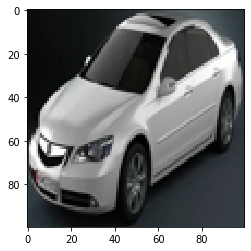

In [5]:

l=r'natural-images/car_0001.jpg'  #location of unknown image

i=cv2.imread(l)   #function used to read pixels of image
#i   #showing the pixels of that image

plt.imshow(i)  #plotting the image
plt.show()     #showing the image

Concept Of Slicing

In [6]:

name='car_0674.jpg'    #slicing the list
name.split('_')        #Splitting



['car', '0674.jpg']

OS library and its functions 

In [7]:
#Importing OS Library for dealing with the Directory(ALL Files at the same time )
import os

os.listdir(loc)  #Listdir displays all files in current directory




['car_0000.jpg',
 'car_0001.jpg',
 'car_0002.jpg',
 'car_0003.jpg',
 'car_0004.jpg',
 'car_0005.jpg',
 'car_0006.jpg',
 'car_0007.jpg',
 'car_0008.jpg',
 'car_0009.jpg',
 'car_0010.jpg',
 'car_0011.jpg',
 'car_0012.jpg',
 'car_0013.jpg',
 'car_0014.jpg',
 'car_0015.jpg',
 'car_0016.jpg',
 'car_0017.jpg',
 'car_0018.jpg',
 'car_0019.jpg',
 'car_0020.jpg',
 'car_0021.jpg',
 'car_0022.jpg',
 'car_0023.jpg',
 'car_0024.jpg',
 'car_0025.jpg',
 'car_0026.jpg',
 'car_0027.jpg',
 'car_0028.jpg',
 'car_0029.jpg',
 'car_0030.jpg',
 'car_0031.jpg',
 'car_0032.jpg',
 'car_0033.jpg',
 'car_0034.jpg',
 'car_0035.jpg',
 'car_0036.jpg',
 'car_0037.jpg',
 'car_0038.jpg',
 'car_0039.jpg',
 'car_0040.jpg',
 'car_0041.jpg',
 'car_0042.jpg',
 'car_0043.jpg',
 'car_0044.jpg',
 'car_0045.jpg',
 'car_0046.jpg',
 'car_0047.jpg',
 'car_0048.jpg',
 'car_0049.jpg',
 'car_0050.jpg',
 'car_0051.jpg',
 'car_0052.jpg',
 'car_0053.jpg',
 'car_0054.jpg',
 'car_0055.jpg',
 'car_0056.jpg',
 'car_0057.jpg',
 'car_0058.jpg

In [8]:
os.path           #Tells about current Path

<module 'ntpath' from 'C:\\Users\\harsh\\Anaconda3\\lib\\ntpath.py'>

In [9]:
os.path.join(loc,'car_0674.jpg')  #joining the path using join command

'natural-images\\car_0674.jpg'

Extracing Labels from set of images using slicing concept

In [10]:
import os  
label=[]   #List for labels
for i in os.listdir(loc):    #looping the directory
    if i.split('_')[0]=='car':
        label.append(2)
    elif i.split('_')[0]=='motorbike':      #we are separating labels
        label.append(0)
    if i.split('_')[0]=='person':
        label.append(0)


Extracting the features now 

In [11]:
#features we require now
features=[]     #list for features
for i in os.listdir(loc):
    f=cv2.imread(os.path.join(loc,i))  #joining the path of each image in the loop 
    resized_f=cv2.resize(f,(70,70))   #resizing all imgaes to reduce computation and also give each image a dimension
    features.append(resized_f)
    



In [12]:
#we got features but its a 4 dimensional array
import numpy as np
np.array(features).shape    #np.array used to convert features into array



(2742, 70, 70, 3)

Getting Dataset into Variables

In [13]:
#Convering Features and Labels into array so that they can be passed to models
X=np.array(features)
Y=np.array(label)
X=X.reshape(2742,14700)   #converting features of 4 dimensions into d dimensions using reshape function

Splitting the Data set into test and train

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

Using Decision Tree Classifier

In [15]:

from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier()       #dmodel as object for decision tree classifier

In [18]:
#passing the 2D features   
dmodel.fit(xtrain,ytrain)            #Training the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
#Training Accuracy  
#Accuracy over which you trained Model
dmodel.score(xtrain,ytrain)  

1.0

In [21]:
#Testing Accuracy
#Accuracy over that which we have not trained the model
dmodel.score(xtest,ytest)  
#testing accuracy is low
#overfit model : training accuracy is high testing acccuracy has difference of 20%
#so we rejected Decision tree classifier


0.8746355685131195

Testing accuracy is Low for Decision tree classifier but Training Accuracy is 1 Means Model More memorizing the data
# Decision Tree is Overfit model for this Data set 

Prediction 

In [22]:
dmodel.predict(xtest[50].reshape(1,-1)) #predicitng   
 # 2 For car 

array([2])

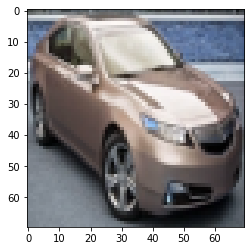

In [23]:
#plotting the predicted Value TO check 
import matplotlib.pyplot as plt
plt.imshow(xtest[50].reshape(70,70,3)) 
plt.show()

Using Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#Training Accuracy
#Accuracy Of Random Forst over Training Data
rmodel.score(xtrain,ytrain)

0.9970817120622568

In [26]:
#Testing Accuracy
#accuracy of random forest over test data
rmodel.score(xtest,ytest)
#decision tree is more memorising the data then random forest


0.924198250728863

The Training and Testing accuracy are just having diffrerence  of 6% means very less error in case of random forest.

# Random Forest is actually better trained than decision tree

In [40]:
rmodel.predict(xtest[50].reshape(1,-1)) #predicitng   
 # 2 For car 
 # 1 For Motorbike 
 # 0 for Person

array([2])

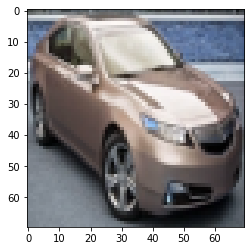

In [41]:
#plotting the predicted Value TO check 
import matplotlib.pyplot as plt
plt.imshow(xtest[50].reshape(70,70,3)) 
plt.show()

Using Support Vector Machine

In [27]:
from sklearn.svm import SVC
smodel=SVC()
smodel.fit(xtrain,ytrain)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
#Testing Accuracy of Support Vector Machine
#Accuracy of SVM over training Data
smodel.score(xtrain,ytrain)


1.0

In [29]:
#Training Accuracy
smodel.score(xtest,ytest)



0.6443148688046647

Testing accuracy is very Low for SVM  but Training Accuracy is 1 Means Model More memorizing the data than getting trained.

# SVM fail here because it fails here because of no proper separation of data

In [47]:
smodel.predict(xtest[50].reshape(1,-1)) #predicitng   
 # 2 For car 

array([0])

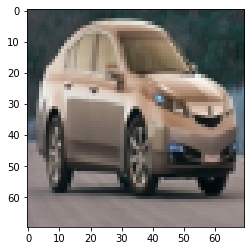

In [48]:
#plotting the predicted Value TO check 
import matplotlib.pyplot as plt
plt.imshow(xtest[30].reshape(70,70,3)) 
plt.show()

Using Naive baiyes

In [30]:
# using gaussian naive bayes
from sklearn.naive_bayes import GaussianNB 
gmodel=GaussianNB()

In [31]:
#Trainig over data
gmodel.fit(xtrain,ytrain) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
#Training Accuracy of Naive bayes
#Accuracy of Naive Bayes over training Data
gmodel.score(xtrain,ytrain)

0.8448443579766537

In [33]:
#Testing Accuracy
gmodel.score(xtest,ytest)
#it is actually being trained rather than being learning

0.8527696793002916

Training  accuracy is  Low for Naive bayes but Training Accuracy is also comparable Means Model is getting trained More memorizing the data .

# Naive Bayes is also not getting the Proper Data effect  means not good for this data.

In [36]:
gmodel.predict(xtest[50].reshape(1,-1)) #predicitng   
 # 2 For car 
 # 1 For motorbike
 # 0 Person

array([2])

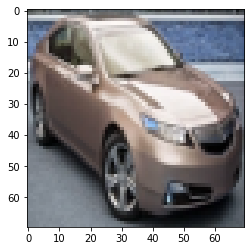

In [37]:
#plotting the predicted Value TO check 
import matplotlib.pyplot as plt
plt.imshow(xtest[50].reshape(70,70,3)) 
plt.show()